<a href="https://colab.research.google.com/github/TSHP/DL4SC_Neural_ODEs/blob/main/ToyExampleTobia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading in the MNIST DATASET

In [101]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import torch.nn as nn
from torch.nn import ReLU
from torch import optim
import matplotlib.pyplot as plt
from torch.nn.functional import one_hot

In [121]:

mnistTrainSet = torchvision.datasets.MNIST(root='./data', train=True,
                                    download=True, transform=transforms.ToTensor()) # might need to normalize
mnistTrainLoader = torch.utils.data.DataLoader(mnistTrainSet, batch_size=64,
                                      shuffle=True)

Constructing a 1 Layer MLP

In [116]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MLP, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
        self.Relu = ReLU()
    def forward(self, x):
        out = self.linear(x)
        out = self.Relu(out)
        return out

In [117]:
batch_size = 64
in_dim, num_class = 28*28, 10

l_r = 0.01
model = MLP(in_dim, num_class)
optimizer = optim.Adam(model.parameters(), lr=l_r, weight_decay = 0.1)
criterion = nn.CrossEntropyLoss()

Train with 10 class probabilities

In [119]:
total_steps = len(mnistTrainLoader)
epochs = 10
for cur_epoch in range(epochs):
  for x, (images, labels) in enumerate(mnistTrainLoader):
    images = images.reshape(-1, 28*28)
    labels = one_hot(labels, num_classes=10)

    out = model(images)

    losses = criterion(out, labels.float())

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()
    if (x+1) % 200 == 0:
      print (f'Epoch[{cur_epoch+1}/{epochs}], Step[{x+1}/{total_steps}], Losses: {losses.item():.4f}')
print(losses.item())

tensor([[0.0000e+00, 3.6418e+00, 1.6842e-01, 1.3093e+00, 0.0000e+00, 4.7294e-01,
         2.4740e-01, 3.1215e-01, 1.1375e+00, 4.5746e-01],
        [0.0000e+00, 6.3364e-01, 8.6953e-01, 7.6207e-01, 2.0146e+00, 1.2017e+00,
         3.6460e-01, 1.3560e+00, 2.9806e+00, 1.4990e+00],
        [4.3796e+00, 0.0000e+00, 0.0000e+00, 1.5602e+00, 6.2065e-01, 2.6411e+00,
         1.1226e+00, 2.3506e-01, 8.4552e-01, 8.8619e-01],
        [0.0000e+00, 2.9500e+00, 5.4566e-01, 6.8965e-01, 2.4575e-01, 1.4950e-01,
         0.0000e+00, 0.0000e+00, 1.1558e+00, 6.2901e-02],
        [3.6359e+00, 0.0000e+00, 5.6129e+00, 1.6752e+00, 5.3968e-01, 0.0000e+00,
         4.0417e+00, 0.0000e+00, 1.2026e+00, 0.0000e+00],
        [0.0000e+00, 4.1683e+00, 1.7463e+00, 1.4154e+00, 1.0967e-01, 2.2024e-01,
         0.0000e+00, 0.0000e+00, 2.0963e+00, 0.0000e+00],
        [4.6445e+00, 0.0000e+00, 0.0000e+00, 9.1351e-01, 1.4173e+00, 3.5692e+00,
         1.6120e+00, 3.9185e-01, 0.0000e+00, 5.6348e-02],
        [0.0000e+00, 4.4412

Dataloader Understanding

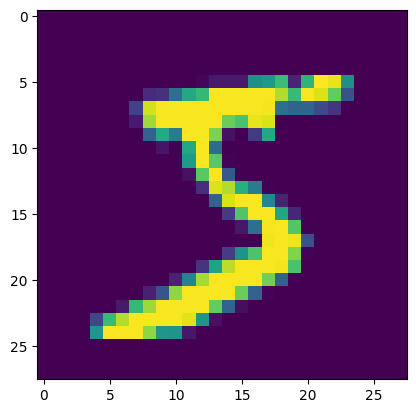

In [73]:
plt.imshow(mnistTrainSet.data[0])
plt.show()

In [40]:
for idx, batch in enumerate(mnistTrainLoader):
  print('Batch index: ', idx)
  print('Batch size: ', batch[0].size())
  print('Batch label: ', batch[1])
  break

Batch index:  0
Batch size:  torch.Size([64, 1, 28, 28])
Batch label:  tensor([0, 9, 4, 2, 8, 2, 9, 9, 9, 3, 0, 7, 8, 1, 2, 8, 8, 6, 7, 5, 0, 8, 0, 8,
        2, 7, 0, 3, 2, 6, 5, 4, 4, 2, 1, 5, 4, 3, 7, 9, 4, 8, 3, 0, 0, 9, 9, 5,
        8, 5, 7, 3, 3, 6, 3, 1, 1, 5, 7, 5, 2, 3, 8, 0])


In [44]:
for idx, (data, target) in enumerate(mnistTrainLoader):
    print(data[0].shape)
    print(len(data))
    print(len(target))
    print(target[0])
    break

torch.Size([1, 28, 28])
64
64
tensor(4)
